
Call:
glm(formula = treatment ~ female + age + pim2 + pelod + p_bloodculture + 
    comorbidity + rf_pneumonia + rf_sepsis + rf_aspiration + 
    rf_transfusion + rf_trauma + rf_drowning + MODS + d2_oi, 
    family = binomial(), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8234  -0.6937  -0.5249   0.7186   2.4828  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.302825   0.655808  -5.036 4.75e-07 ***
female           0.322249   0.300782   1.071    0.284    
age              0.003452   0.033778   0.102    0.919    
pim2             0.009458   0.009337   1.013    0.311    
pelod            0.019158   0.018607   1.030    0.303    
p_bloodculture   0.475819   0.406994   1.169    0.242    
comorbidity     -0.032601   0.317498  -0.103    0.918    
rf_pneumonia     0.592276   0.516553   1.147    0.252    
rf_sepsis       -0.646540   0.401143  -1.612    0.107    
rf_aspiration    0.069461   0.729313   0.095  

[[1]]
[1] 0.8255792

                            Stratified by treatment
                             0             1             p      test
  n                            206           101                    
  female (mean (sd))          0.44 (0.50)   0.53 (0.50)   0.126     
  age (mean (sd))             4.04 (4.78)   4.04 (4.31)   0.998     
  pim2 (mean (sd))           15.51 (20.65) 19.82 (22.91)  0.099     
  pelod (mean (sd))           9.44 (10.19) 11.04 (10.09)  0.196     
  p_bloodculture (mean (sd))  0.16 (0.36)   0.20 (0.40)   0.351     
  comorbidity (mean (sd))     0.45 (0.50)   0.57 (0.50)   0.043     
  rf_pneumonia (mean (sd))    0.80 (0.40)   0.84 (0.37)   0.341     
  rf_sepsis (mean (sd))       0.30 (0.46)   0.30 (0.46)   0.987     
  rf_aspiration (mean (sd))   0.05 (0.22)   0.04 (0.20)   0.725     
  rf_transfusion (mean (sd))  0.01 (0.10)   0.02 (0.14)   0.465     
  rf_trauma (mean (sd))       0.02 (0.14)   0.00 (0.00)   0.160     
  rf_drowning (mean (sd))     

Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”


Call:
matchit(formula = treatment ~ female + age + pim2 + pelod + p_bloodculture + 
    comorbidity + rf_pneumonia + rf_sepsis + rf_aspiration + 
    rf_transfusion + rf_trauma + rf_drowning + MODS, data = mydata_wth_pscore, 
    method = "nearest", distance = mydata_wth_pscore$pscore, 
    caliper = 0.05, ratio = 1)

Summary of balance for all data:
               Means Treated Means Control SD Control Mean Diff eQQ Med
distance              0.5214        0.2347     0.1731    0.2867  0.2816
female                0.5347        0.4417     0.4978    0.0929  0.0000
age                   4.0360        4.0374     4.7778   -0.0013  0.5400
pim2                 19.8198       15.5146    20.6492    4.3052  1.4000
pelod                11.0396        9.4417    10.1911    1.5979  1.0000
p_bloodculture        0.1980        0.1553     0.3631    0.0427  0.0000
comorbidity           0.5743        0.4515     0.4989    0.1228  0.0000
rf_pneumonia          0.8416        0.7961     0.4039    0.0455  0.000

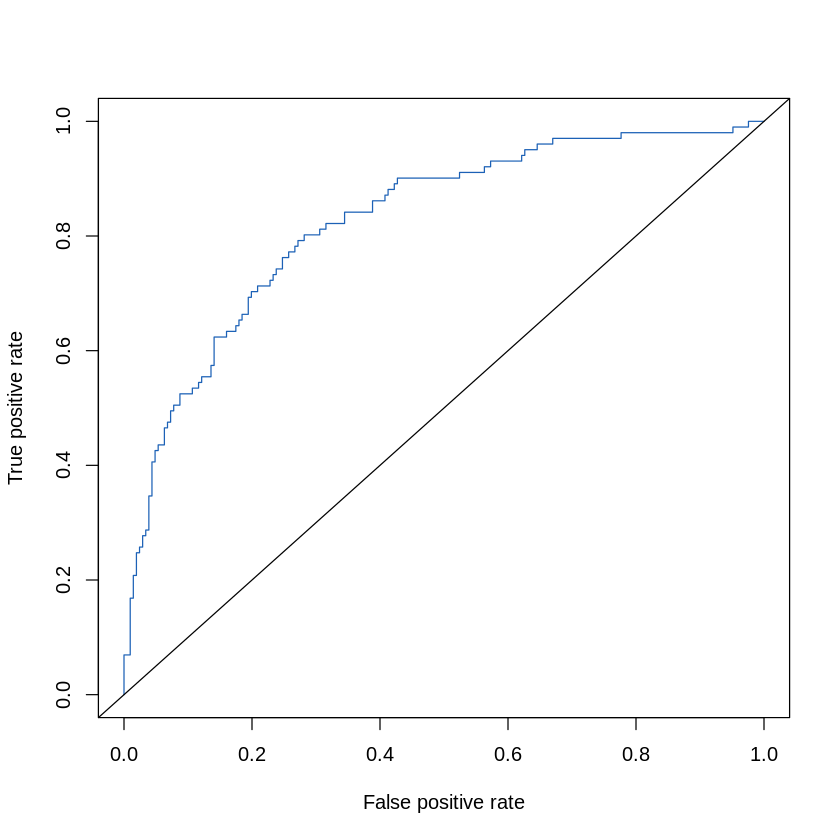

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

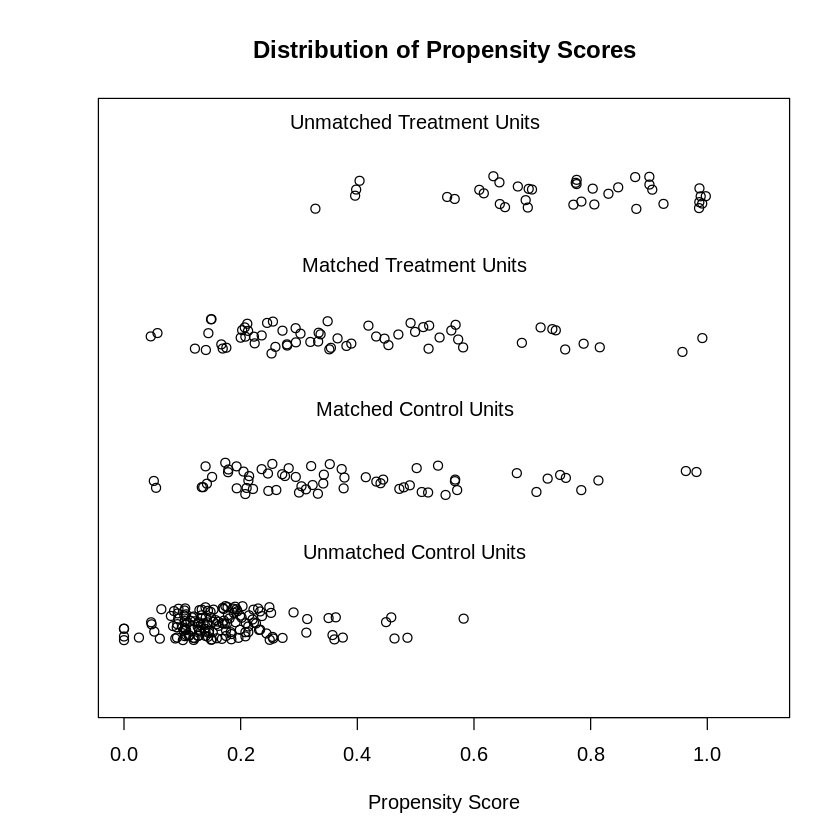

                            Stratified by treatment
                             0             1             p      test
  n                             63            63                    
  female (mean (sd))          0.51 (0.50)   0.51 (0.50)   1.000     
  age (mean (sd))             4.39 (4.90)   4.30 (4.65)   0.917     
  pim2 (mean (sd))           17.93 (23.25) 18.42 (20.56)  0.899     
  pelod (mean (sd))           9.95 (10.82) 11.24 (9.50)   0.480     
  p_bloodculture (mean (sd))  0.22 (0.42)   0.13 (0.34)   0.162     
  comorbidity (mean (sd))     0.60 (0.49)   0.51 (0.50)   0.286     
  rf_pneumonia (mean (sd))    0.83 (0.38)   0.83 (0.38)   1.000     
  rf_sepsis (mean (sd))       0.38 (0.49)   0.30 (0.46)   0.351     
  rf_aspiration (mean (sd))   0.05 (0.21)   0.05 (0.21)   1.000     
  rf_transfusion (mean (sd))  0.03 (0.18)   0.00 (0.00)   0.156     
  rf_trauma (mean (sd))       0.00 (0.00)   0.00 (0.00)   NaN       
  rf_drowning (mean (sd))     0.02 (0.13)   0.03 (0

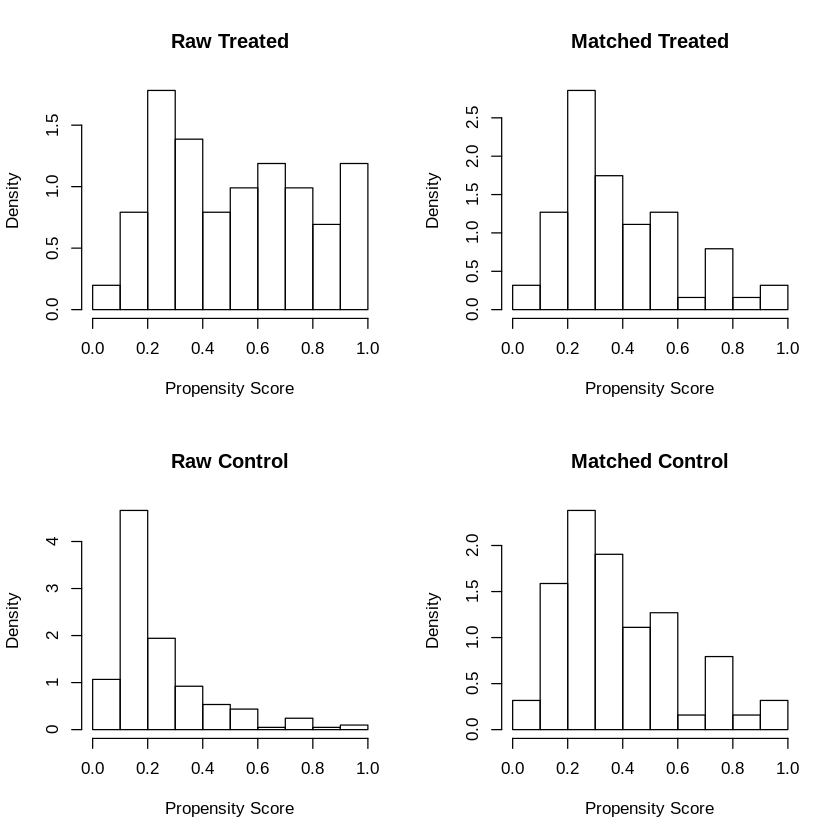

In [37]:
## Load packages and data
library(tableone)
library(MatchIt)
library(Matching)
library(pROC)
library(ROCR)
library(ggplot2)
library(epitools)
library(dplyr)

library(gtools)

####loading KKH ICU data
kkh_data <- read.csv("PICUARD_DATA_1219.csv")
df<-data.frame(kkh_data)
kkh<-df[!is.na(df$d2_oi),]
kkh <- kkh[which(((kkh$hfv==1)&(kkh$early_HFV == 1))| ((kkh$hfv==0))), ]
####check column names
#colnames(kkh, do.NULL = FALSE)

####select features
ID<-kkh$Study.ID
female<-as.numeric(kkh$Gender=='Female')
age<-kkh$Age
pim2<-kkh$pim2
pelod<-kkh$pelod
p_bloodculture<-as.numeric(kkh$Positive_blood_culture=='Yes')
early_HFV<-kkh$early_HFV

#comorbidity
comorbidity<-kkh$comorbidity

#risk factor of ARDS
rf_pneumonia<-as.numeric(kkh$PNEUMONIA=='Checked')
rf_sepsis<-as.numeric(kkh$SEPSIS=='Checked')
rf_aspiration<-as.numeric(kkh$ASPIRATION=='Checked')
rf_transfusion<-as.numeric(kkh$TRANSFUSION=='Checked')
rf_trauma<-as.numeric(kkh$TRAUMA=='Checked')
rf_drowning<-as.numeric(kkh$DROWNING=='Checked')

#other useful features
#cardiac_failure<-as.numeric(kkh$Cardiac.failure.or.fluid.overload=='Yes')
MODS<-as.numeric(kkh$MODS=='Yes')
#Received_pulmonary_vasodilators<-as.numeric(kkh$Received_pulmonary_vasodilators=='Yes')
#blood gas labtest
#D1_FiO2<-kkh$D1_FiO2
#D1_SpO2<-kkh$D1_SpO2
d2_oi<-kkh$d2_oi
#treatment and mortality
#treatment<-kkh$hfv
treatment<-as.numeric(kkh$Received_HFV=='Yes')

died<-kkh$died_in_ICU
#mortality_100day<-kkh$mortality_100day
#ventilation_free_day<-kkh$ventilation_free_day
#ventilator_duration<-kkh$ventilator_duration
#icu_duration<-kkh$icu_duration
#picu_free_days<-kkh$picu_free_days

####new dataset
mydata<-cbind(ID,female,age,pim2,pelod,p_bloodculture,comorbidity,rf_pneumonia,rf_sepsis,rf_aspiration,rf_transfusion
              ,rf_trauma,rf_drowning,MODS,d2_oi,early_HFV
              ,treatment,died)

mydata<-data.frame(mydata)
xvars<-c("female","age","pim2","pelod","p_bloodculture","comorbidity","rf_pneumonia"
         ,"rf_sepsis","rf_aspiration" , "rf_transfusion", "rf_trauma", "rf_drowning","MODS","d2_oi","early_HFV"
         )
#mydata_noNA <- na.omit(mydata)
#fit a propensity score model with logistic regression
psmodel <-glm(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS+d2_oi
                 , data = mydata,family=binomial())
#show coefficients etc
summary(psmodel)

#create propensity score
pscore<-psmodel$fitted.values
#pscore<-fitted(psmodel) 

label<-mydata$treatment
perf<- ROCR::prediction(pscore, label)
psm_auc<-ROCR::performance(ROCR::prediction(pscore, label), "auc")@y.values[1]
print(psm_auc)
roc.perf = performance(perf, measure = "tpr", x.measure = "fpr")
plot(roc.perf,col="#1c61b6",percent=TRUE)
abline(a=0, b= 1)

#########################################
#look at a table 1
#mydata before matching
table1_unmatched<- CreateTableOne(vars=xvars, strata="treatment", data = mydata)
## include standardized mean difference (SMD)
print(table1_unmatched, smd=FALSE)


#colnames(kkh, do.NULL = TRUE, prefix = "col")
##########################################
## Using the Matchit for propensity score, nearest neighbor matching
mydata_wth_pscore<-data.frame(cbind(mydata,pscore))

m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata_wth_pscore,              
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.05,ratio=1)
summary(m.out)

#propensity score plots
plot(m.out, type="jitter")
plot(m.out, type="hist")
########################################
#use the Matching package
#do greedy matching on propensity score
#psmatch<-Match(Tr=mydata$treatment,M=1, X=pscore,replace=FALSE,caliper=0.2)
#matched<-mydata[unlist(psmatch[c("index.treated","index.control")]),]
#summary(matched)
########################################
#look at Table1 after matching

#Matching Table1
#matchedtab<-CreateTableOne(vars=xvars, strata="treatment",data=matched)
#print(matchedtab, smd=TRUE)

#MatchIt Table1
table1_matched<- CreateTableOne(vars=xvars, strata="treatment", data = match.data(m.out, "all"))
## include standardized mean difference (SMD)
print(table1_matched, smd=FALSE)


p_score,treatment_1
0.57788005,1
0.22036708,1
0.40813167,1
0.48698849,1
0.09534551,1
0.40792885,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


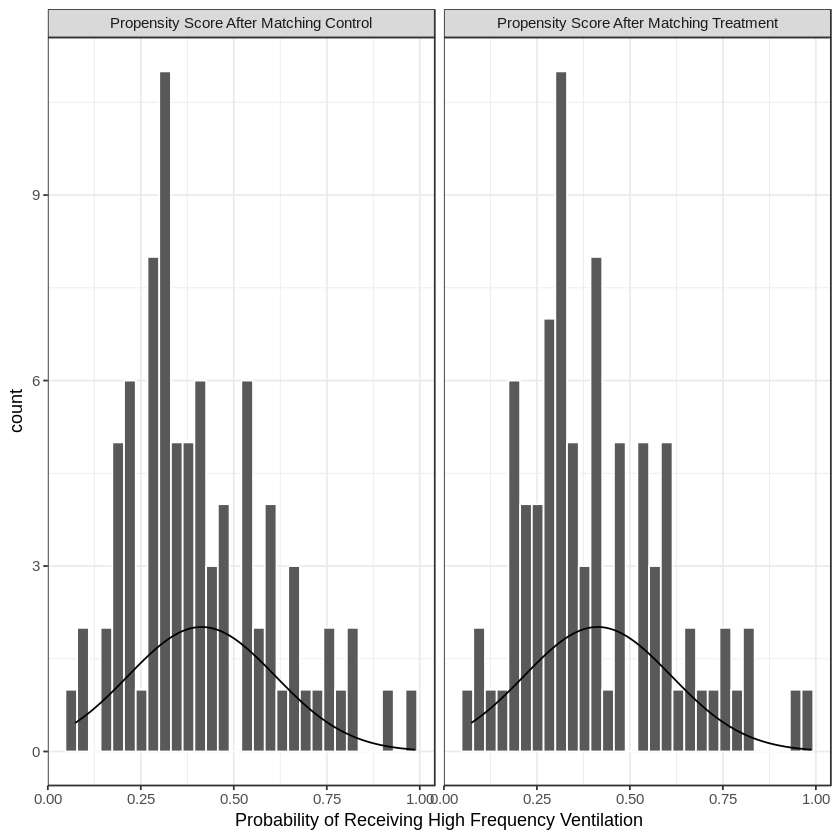

In [3]:
############################################
#checking balance using pscore plots

#using Matching package
#matched_treated<-mydata_wth_pscore[mydata_wth_pscore$ID %in% matched$ID[matched$treatment==1],]['pscore'][,1]
#matched_control<-mydata_wth_pscore[mydata_wth_pscore$ID %in% matched$ID[matched$treatment==0],]['pscore'][,1]

#using MatchIt package
matched_treated<-mydata_wth_pscore[mydata_wth_pscore$ID %in% match.data(m.out, "all")$ID[match.data(m.out, "all")$treatment==1],]['pscore'][,1]
matched_control<-mydata_wth_pscore[mydata_wth_pscore$ID %in% match.data(m.out, "all")$ID[match.data(m.out, "all")$treatment==0],]['pscore'][,1]

pscore_outcome<-rbind(cbind(p_score=matched_treated,treatment_1=1),cbind(p_score=matched_control,treatment_1=0))
prs_df<-data.frame(pscore_outcome)
head(prs_df)
###############################################
#checking balance after matching by ploting the pscore

#dataframe = data.frame(x = matched_treated, x2 = matched_control)
#g = ggplot(dataframe, aes(x)) + geom_histogram( aes(x = x, y = ..density..),binwidth = diff(range(dataframe$x))/30, fill="skyblue") + geom_histogram( aes(x = x2, y = -..density..), binwidth = diff(range(dataframe$x))/30, fill= "lightgreen")
#print(g)

##use histogram
#hist(matched_treated,breaks=12,ylim=c(0,40),col='skyblue',border=F,xlab="Propensity Score", main="Propensity Score After Matching")
#hist(matched_control,add=T,col=scales::alpha('red',.5),border=F)
#x_trt<-seq(min(matched_treated),max(matched_treated),length=length(matched_treated))
#y_trt<-dnorm(x_trt,mean=mean(matched_treated),sd=sd(matched_treated)) 
#y_trt <- y_trt*diff(h$mids[1:2])*length(matched_treated)
#lines(x_trt, y_trt, col="blue", lwd=1)
#x_con<-seq(min(matched_control),max(matched_control),length=length(matched_control))
#y_con<-dnorm(x_con,mean=mean(matched_control),sd=sd(matched_control)) 
#y_con <- y_con*diff(h$mids[1:2])*length(matched_control)
#lines(x_con, y_con, col="red", lwd=1)

# Simulate some data. Individuals' heights in cm.
n        <- length(matched_treated)
mean     <- mean(matched_treated)
sd       <- sd(matched_treated)
binwidth <- 2
height <- rnorm(n, mean, sd)

labs <- paste("Propensity Score After Matching", c("Control", "Treatment"))
prs_df %>%
  mutate(treatment_1 = ifelse(treatment_1 == 1, labs[1], labs[2]))%>%
  ggplot(aes(x = p_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~treatment_1) +
  xlab("Probability of Receiving High Frequency Ventilation") +
  theme_bw()+
stat_function(fun = dnorm, args = list(mean = mean, sd = sd))

In [39]:
###################################
#outcome analysis
#Matching package
#y_treatment<-matched1$died[matched$treatment==1]
#y_control<-matched1$died[matched$treatment==0]

#MatchIt package
y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 



#pairwise difference for continuous data
#diffy<-y_trt-y_con
#paired t-test
#t.test(diffy)

table(y_treatment,y_control)
#McNemar test
mcnemar.test(y_treatment, y_control)

########## calculate Odd's ratio here!
a<-length(y_treatment[y_treatment==1])
b<-length(y_control[y_control==1])
c<-length(y_treatment[y_treatment==0])
d<-length(y_control[y_control==0])

oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2))


           y_control
y_treatment  0  1
          0 23 18
          1 13  9


	McNemar's Chi-squared test with continuity correction

data:  y_treatment and y_control
McNemar's chi-squared = 0.51613, df = 1, p-value = 0.4725


,Disease1,Disease2,Total
Exposed1,22,41,63
Exposed2,27,36,63
Total,49,77,126
,estimate,lower,upper
Exposed1,1.0000000,NA,NA
Exposed2,0.7181036,0.3459807,1.477812
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.3689022,0.4649826,0.3608654


In [22]:
##############################################

m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata, 
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=0.1)

#psmatch<-Match(Tr=mydata$treatment,M=1, X=pscore,replace=FALSE,caliper=0.01)
#matched<-mydata[unlist(psmatch[c("index.treated","index.control")]),]

#MatchIt package
y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 

#Matching package
#y_treatment<-matched$died[matched$treatment==1]
#y_control<-matched$died[matched$treatment==0]

a<-length(y_treatment[y_treatment==1])
b<-length(y_control[y_control==1])
c<-length(y_treatment[y_treatment==0])
d<-length(y_control[y_control==0])

oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2))




Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”

,Disease1,Disease2,Total
Exposed1,26,60,86
Exposed2,37,49,86
Total,63,109,172
,estimate,lower,upper
Exposed1,1.0000000,NA,NA
Exposed2,0.5765563,0.3046182,1.078876
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.08515071,0.1131678,0.08170142


In [42]:
############################################

calipers<-c(0.001,0.01,0.02,0.04,0.06,0.08,0.1)
caliper_0.05<-c(0.05,0.05,0.05,0.05,0.05)
odds<-c()
ci5<-c()
ci95<-c()
p_value<-c()

for(i in calipers){
    
    m.out <- matchit(treatment~female+age+pim2+pelod+p_bloodculture+comorbidity+rf_pneumonia+rf_sepsis
                 +rf_aspiration+rf_transfusion+rf_trauma+rf_drowning+MODS, data = mydata_wth_pscore, 
                 method = "nearest", distance=mydata_wth_pscore$pscore,caliper=i,ratio=1)

    #Matching package
    y_treatment<-match.data(m.out)$died[match.data(m.out, "all")$treatment==1] 
    y_control<-match.data(m.out)$died[match.data(m.out, "all")$treatment==0] 


    a<-length(y_treatment[y_treatment==1])
    b<-length(y_control[y_control==1])
    c<-length(y_treatment[y_treatment==0])
    d<-length(y_control[y_control==0])

    odds<-c(odds,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,1])
    ci5<-c(ci5,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,2])
    ci95<-c(ci95,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$measure[2,3])
    p_value<-c(p_value,oddsratio(matrix(c(a,b,c,d), ncol=2, nrow=2),verbose = FALSE)$p.value[2,1])
    

    
}

outcome_table<-cbind(calipers,odds,ci5,ci95,p_value)
outcome_table


#exp(cbind(Odds_and_OR=coef(psmodel), confint(psmodel)))

Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length > 1 and only the first element will be used”Warning message in if (distance %in% c("GAMlogit", "GAMprobit", "GAMcloglog", "GAMlog", :
“the condition has length 

calipers,odds,ci5,ci95,p_value
0.001,0.3876245,0.03598798,3.023440,0.3755656
0.010,0.7476178,0.30709567,1.799295,0.5165056
0.020,1.0000033,0.45478167,2.198857,1.0000000
0.040,0.9333524,0.44507768,1.953402,0.8544925
0.060,0.7713931,0.37499168,1.575805,0.4766135
0.080,0.7747056,0.37909494,1.572959,0.4801680
0.100,1.1334225,0.56158318,2.294882,0.7264283


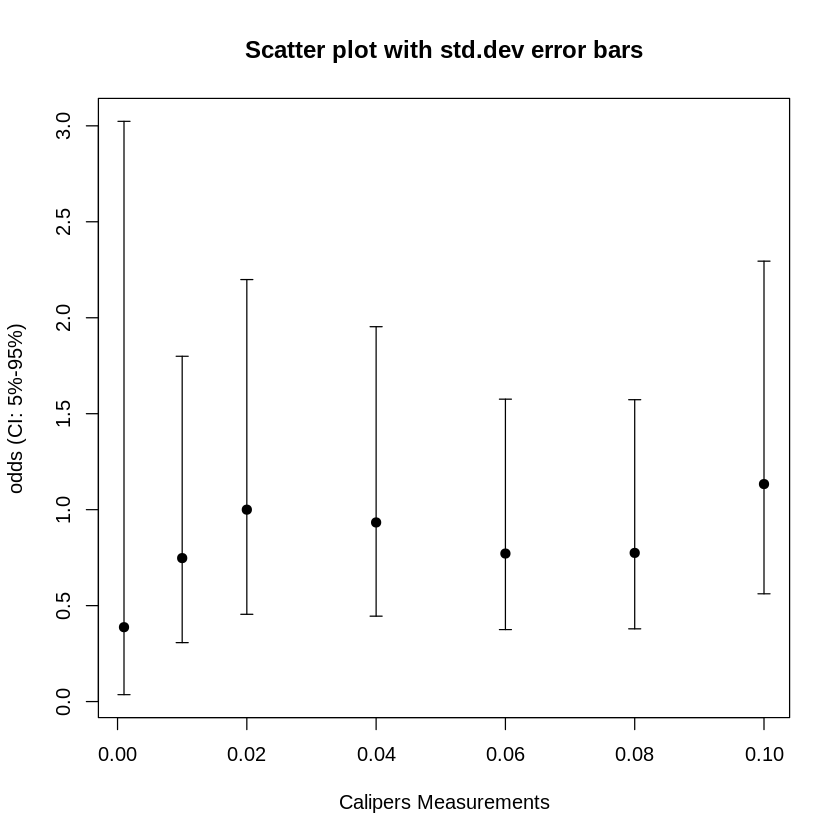

In [43]:
plot(calipers, odds,
    ylim=range(c(ci5, ci95)),
    pch=19, xlab="Calipers Measurements", ylab="odds (CI: 5%-95%)",
    main="Scatter plot with std.dev error bars"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(calipers, ci5, calipers, ci95, length=0.05, angle=90, code=3)

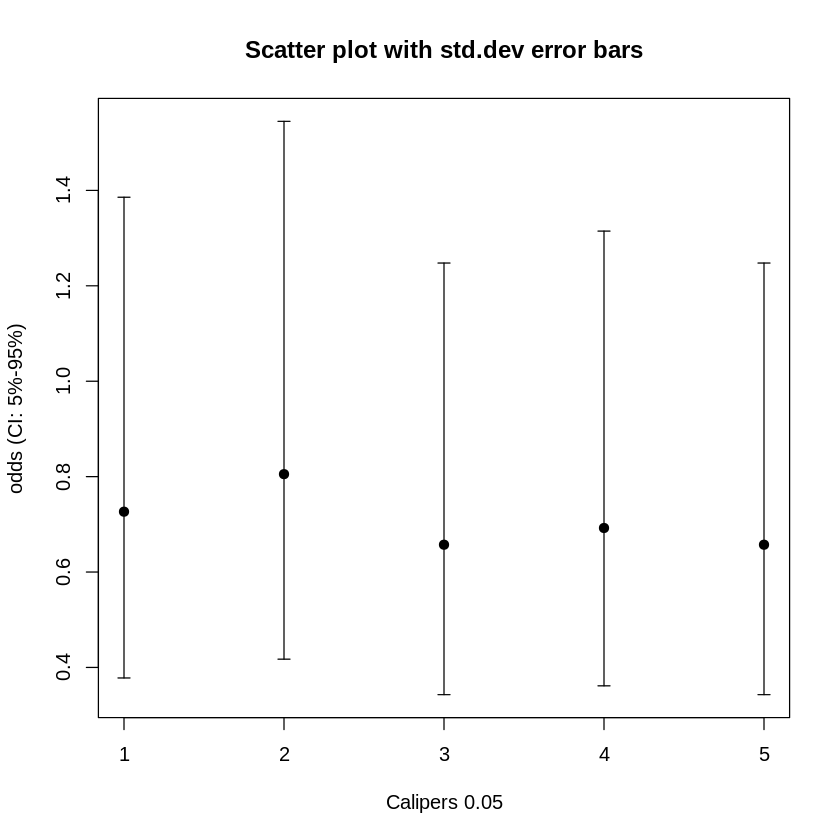

In [19]:
plot( odds,
    ylim=range(c(ci5, ci95)),
    pch=19, xlab="Calipers 0.05", ylab="odds (CI: 5%-95%)",
    main="Scatter plot with std.dev error bars"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(c(1,2,3,4,5), ci5, c(1,2,3,4,5), ci95, length=0.05, angle=90, code=3)

In [22]:
matchedID_hfv<-match.data(m.out)$ID[match.data(m.out, "all")$treatment==1] 
matchedID_non_hfv<-match.data(m.out)$ID[match.data(m.out, "all")$treatment==0]
pairs<-cbind(matchedID_hfv,matchedID_non_hfv)
pairs
write.csv(pairs, file = "pair_ID.csv")

matchedID_hfv,matchedID_non_hfv
1006,1001
1009,1005
1022,1010
1024,1015
1035,1023
1037,1049
1043,1050
1046,1057
1047,1058
1048,1059


In [38]:
length(kkh[,1])

[1] 307